In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df['Price'].nunique()

5000

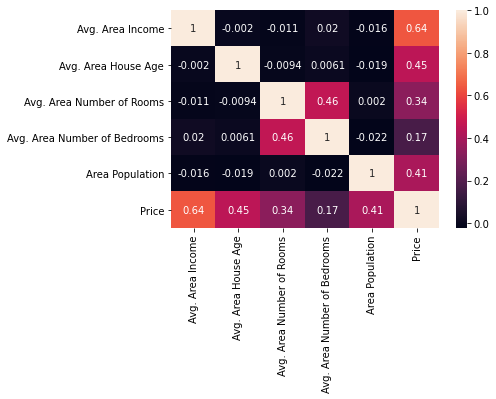

In [7]:
s = sns.heatmap(df.corr(),annot=True)

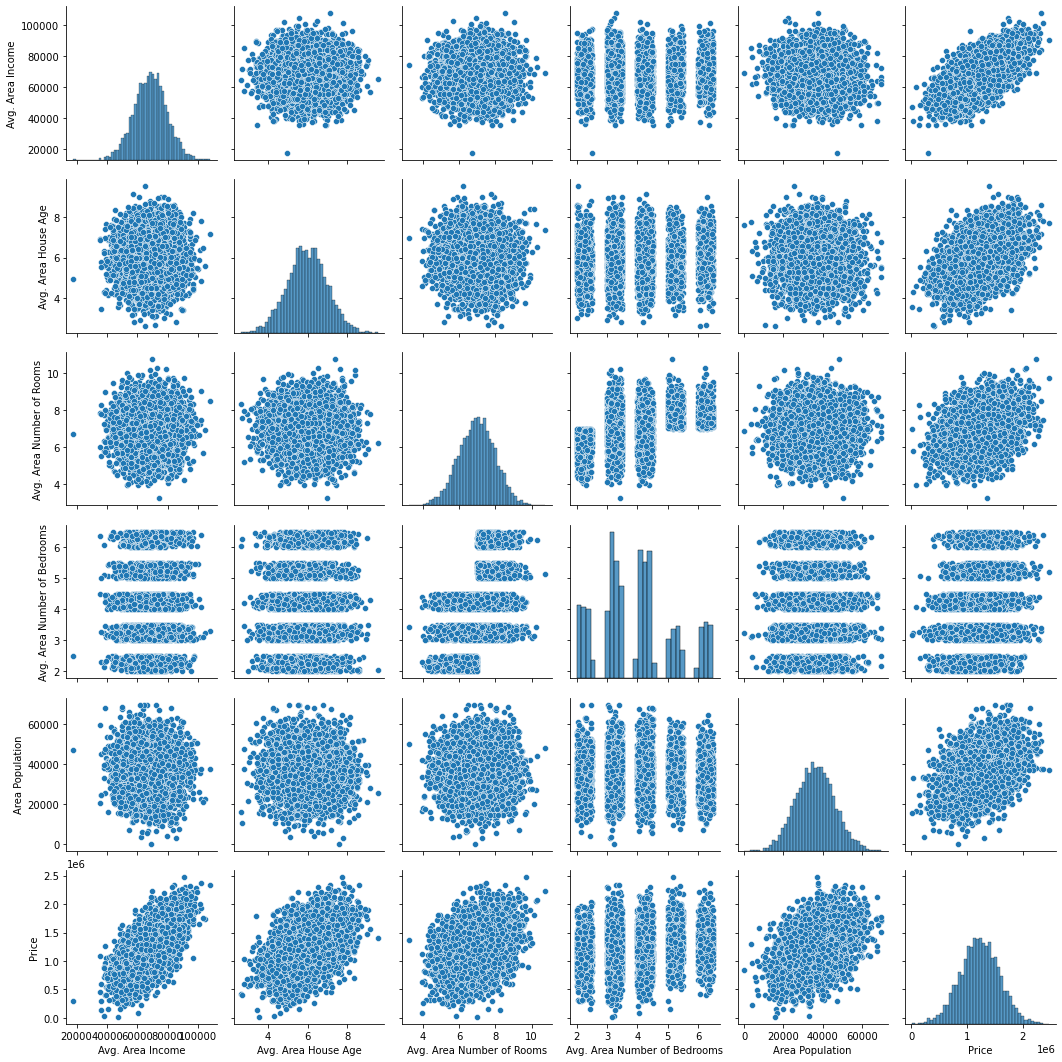

In [8]:
s = sns.pairplot(df)

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
x = df.drop(['Avg. Area Number of Bedrooms','Price', 'Address'],axis=1)
y = df['Price']

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, 
                                                random_state=100)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression().fit(xtrain,ytrain)

In [14]:
pd.DataFrame(model.coef_, columns=['Coef'],index=x.columns)

,Coef
Avg. Area Income,21.441028
Avg. Area House Age,166082.059499
Avg. Area Number of Rooms,121232.701780
Area Population,15.325368


In [26]:
xtest.shape

(1000, 4)

In [27]:
ypred = model.predict(xtest)

In [29]:
ypred[:5]

array([ 813348.22482692, 1559843.95105419, 1323645.99026242,
       1189037.62265361,  968615.99097414])

In [32]:
ytest.values[:5]

array([ 800809.13168613, 1620949.4369106 , 1219637.36651886,
       1172133.48684149,  864483.75849638])

In [37]:
model.score(xtest,ytest)

0.9175480820797793

In [38]:
print('Model Score on Training Data: {}%'.format(
    round(model.score(xtrain,ytrain)*100,2)))

Model Score on Training Data: 91.81%


In [39]:
print('Model Score on Test Data: {}%'.format(
    round(model.score(xtest,ytest)*100,2)))

Model Score on Test Data: 91.75%


In [44]:
sns.set_style('whitegrid')

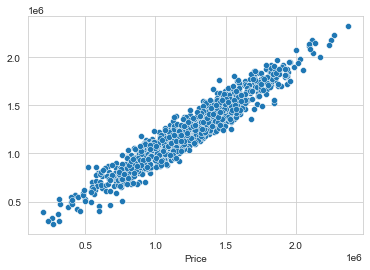

In [49]:
s = sns.scatterplot(x=ytest,y=ypred)

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
print('MAE:',mean_absolute_error(ytest,ypred))

MAE: 81809.2000106329


##### Saving the Model

In [22]:
pd.to_pickle(model, 'HousePricePredictor.pkl')

##### Using the Model to predict price for unknown parameters

In [15]:
inc = eval(input('Enter your income:     '))
age = eval(input('Enter house age:       '))
room = eval(input('Enter number of rooms: '))
pop = eval(input('Enter the population:  '))
querydf = pd.DataFrame({'income': [inc], 'age': [age], 
                       'room':[room], 'population': [pop]})
querydf

Enter your income:      30000
Enter house age:        5
Enter number of rooms:  7
Enter the population:   40000


,income,age,room,population
0,30000,5,7,40000


##### Read the model file (pickle file)

In [23]:
m = pd.read_pickle('HousePricePredictor.pkl')

In [24]:
print('Predicted price:',round(m.predict(querydf)[0], 1))

Predicted price: 303130.4


## GUI Developmenmt

In [52]:
import tkinter as tkn

In [64]:
app = tkn.Tk()
app.geometry('300x250')
app.title('Price Predictor')
mod = pd.read_pickle('HousePricePredictor.pkl')

inc = tkn.Variable(app)
age = tkn.Variable(app)
room = tkn.Variable(app)
pop = tkn.Variable(app)
result = tkn.Variable(app)

tkn.Label(app,text='Income:    ',font=('Arial',15)).place(x=10,y=20)
tkn.Label(app,text='House Age: ',font=('Arial',15)).place(x=10,y=50)
tkn.Label(app,text='Rooms:     ',font=('Arial',15)).place(x=10,y=80)
tkn.Label(app,text='Population:',font=('Arial',15)).place(x=10,y=110)
tkn.Label(app,textvariable=result, font=('Arial',15),fg='red').place(x=110,y=200)

tkn.Entry(app,textvariable=inc,width=12,font=('Arial',15)).place(x=130,y=20)
tkn.Entry(app,textvariable=age,width=12,font=('Arial',15)).place(x=130,y=50)
tkn.Entry(app,textvariable=room,width=12,font=('Arial',15)).place(x=130,y=80)
tkn.Entry(app,textvariable=pop,width=12,font=('Arial',15)).place(x=130,y=110)

def prediction():
    global mod
    income = eval(inc.get())
    houseage = eval(age.get())
    rooms = eval(room.get())
    population = eval(pop.get())
    query = [[income, houseage, rooms, population]]
    result.set(round(mod.predict(query)[0],0))

tkn.Button(app, text='Predict', font=('Arial',15),bg='white',
           command=prediction).place(x=110,y=160)

app.mainloop()